# Network Models

Probably the easiest kinds of statistical models for us to think about are the *network models*. These types of models (like the name imples) describe the random processes which you'd find when you're only looking at one network. We can have models which assume all of the nodes connect to each other essentially randomly, models which assume that the nodes are in distinct *communities*, and many more.

The important realization to make about statistical models is that a model is *not* a network: it's the random process that *creates* a network. You can sample from a model a bunch of times, and because it's a random process, you'll end up with networks that look a little bit different each time -- but if you sampled a lot of networks and then averaged them, then you'd likely be able to get a reasonable ballpark estimation of what the model that they come from looks like.  

Let's pretend that we have a network, and the network is unweighted (meaning, we only have edges or not-edges) and undirected (meaning, edges connect nodes both ways). It'd have an adjacency matrix which consists of only 1's and 0's, because the only information we care about is whether there's an edge or not. The model that generated this network is pretty straightforward: there's just some universal probability that each node connects to each other node, and there are 10 nodes.

In [2]:
import matplotlib.pyplot as plt
from graspologic.simulations import er_np
from graspologic.plot import binary_heatmap

fig, ax = plt.subplots(figsize=(4,4))
n = 10
p = .5
A = er_np(n, p)
binary_heatmap(A, ax=ax, yticklabels=5, linewidths=1, linecolor="black", title="A small, simple network");

ImportError: cannot import name 'binary_heatmap' from 'graspologic.plot' (/Users/eric/.virtualenvs/graph-book/lib/python3.8/site-packages/graspologic/plot/__init__.py)

This small, simple network is one of many possible networks that we can generate with this model. Here are some more:

NameError: name 'p' is not defined

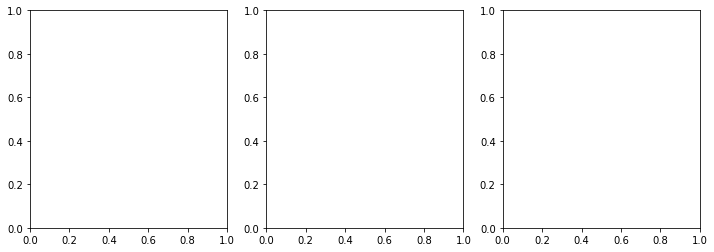

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for ax in axs.flat:
    A = er_np(n, p)
    hmap = binary_heatmap(A, ax=ax, yticklabels=5, linewidths=1, linecolor="black", cbar=False)
plt.suptitle("Three small, simple networks", fontsize=20)
plt.tight_layout()

One reasonable question to ask is how *many* possible networks we could make in this simple scenario? We've already made four, and it seems like there are more that this model could potentially generate.

As it turns out, "more" is a pretty massive understatement. To actually figure out the number, think about the first node: there are two possibilities (weighted or not weighted), so you can generate two networks from a one-node model. Now, let's add an additional node. For each of the first two possibilities, there are two more -- so there are $2 \times 2 = 4$ total possible networks. Every node that we add doubles the number of networks - and since a network with $n$ nodes has $n \times n$ edges, the total number of possible networks ends up being $2^{n \times n} = 2^{n^2}$! So this ten-node model can generate $2^{10^2} = 2^{100}$ networks, which is, when you think carefully, an absurdly, ridiculously big number.

Throughout many of the succeeding sections, we will attempt to make the content accessible to readers with, and without, a more technical background. To this end, we have added sections with leading asterisks (\*). While we believe these sections build technical depth, we don't think they are critical to understanding many of the core ideas for network machine learning. In contrast with unstarred sections, these sections will assume familiarity with more advanced mathematical and probability concepts.

## *Foundation

To understand network models, it is crucial to understand the concept of a network as a random quantity, taking a probability distribution. We have a realization $A$, and we think that this realization is random in some way. Stated another way, we think that there exists a network-valued random variable $\mathbf A$ that governs the realizations we get to see. Since $\mathbf A$ is a random variable, we can describe it using a probability distribution. The distribution of the network topology is the function $\mathbb P$ which, if $\mathbf A$ is an unweighted random network with $n$ edges, assigns probabilities to every possible configuration that $\mathbf A$ could take. Notationally, we write that $\mathbf A \sim \mathbb P$, which is read in words as "the random network $\mathbf A$ is distributed according to $\mathbb P$." 

In the preceding description, we made a fairly substantial claim: $\mathbb P$ assigns probabilities to every possible configuration that realizations of $\mathbf A$, denoted by $A$, could take. How many possibilities are there for a network with $n$ nodes? Let's limit ourselves to simple networks: that is, $A$ takes values that are unweighted ($A$ is *binary*), undirected ($A$ is *symmetric*), and loopless ($A$ is *hollow*). Formally, we describe $\mathcal A_n$ as:

\begin{align*}
    \mathcal A_n \triangleq \left\{A : A \textrm{ is an $n \times n$ matrix with $0$s and $1$s}, A\textrm{ is symmetric}, A\textrm{ is hollow}\right\}
\end{align*}

In words, $\mathcal A_n$ is the set of all possible adjacency matrices $A$ that correspond to simple networks with $n$ nodes. Stated another way: every $A$ that is found in $\mathcal A$ is a *binary* $n \times n$ matrix ($A \in \{0, 1\}^{n \times n}$), $A$ is symmetric ($A = A^\top$), and $A$ is *hollow* ($diag(A) = 0$, or $A_{ii} = 0$ for all $i = 1,...,n$). To summarize the statement that $\mathbb P$ assigns probabilities to every possible configuration that realizations of $\mathbf A$ can take, we write that $\mathbb P : \mathcal A_n \rightarrow [0, 1]$. This means that for any $A \in \mathcal A_n$ which is a possible realization of a random network $\mathbf A$, that $\mathbb P(\mathbf A = A)$ is a probability (it takes a value between $0$ and $1$). If it is completely unambiguous what the random variable $\mathbf A$ refers to, we might abbreviate $\mathbb P(\mathbf A = A)$ with $\mathbb P(A)$. This statement can alternatively be read that the probability that the random variable $\mathbf A$ takes the value $A$ is $\mathbb P(A)$. Finally, let's address that question we had in the previous paragraph. How many possible adjacency matrices are in $\mathcal A_n$?

Let's imagine what just one $A \in \mathcal A_n$ can look like. Note that each matrix $A$ has $n \times n = n^2$ possible entries, in total, since it is an $n \times n$ matrix. As there are no diagonal entries to our matrix $A$, this means that there are $n^2 - n = n(n - 1)$ values that are definitely not $0$ in $A$, since there are $n$ diagonal entries of $A$ (due to the fact that it is *hollow*).  As the transposes are the same (because of the *symmetry* of $A$), for every $a_{ij}$, we would also *double count* the $a_{ji}$ entry. This means that $A$ has a total of $\frac{1}{2}n(n - 1)$ possible entries which are randomly determined, which is equal to the expression $\binom{n}{2}$. Finally, note that for each entry of $A$ which is randomly determined, that the adjacency can take one of $2$ possible values: $0$ or $1$. To write this down formally, for every possible edge which is randomly determined, we have *two* possible values that edge could take. Let's think about building some intuition here:
1. If $A$ is $2 \times 2$, there are $\binom{2}{2} = 1$ unique entry of $A$, which takes one of $2$ values. There are $2$ possible ways that $A$ could look:
\begin{align*}
    \begin{bmatrix}
        0 & 1 \\
        1 & 0
    \end{bmatrix}\textrm{ or }
    \begin{bmatrix}
        0 & 0 \\
        0 & 0
    \end{bmatrix}
\end{align*}
2. If $A$ is $3 \times 3$, there are $\binom{3}{2} = \frac{3 \times 2}{2} = 3$ unique entries of $A$, each of which takes one of $2$ values. There are $8$ possible ways that $A$ could look:
\begin{align*}
&\begin{bmatrix}
    0 & 1 & 1 \\
    1 & 0 & 1 \\
    1 & 1 & 0
    \end{bmatrix}\textrm{ or }
\begin{bmatrix}
    0 & 1 & 0 \\
    1 & 0 & 1 \\
    0 & 1 & 0
    \end{bmatrix}\textrm{ or }
\begin{bmatrix}
    0 & 0 & 1 \\
    0 & 0 & 1 \\
    1 & 1 & 0
    \end{bmatrix}
    \textrm{ or }\\
&\begin{bmatrix}
    0 & 1 & 1 \\
    1 & 0 & 0 \\
    1 & 0 & 0
    \end{bmatrix}\textrm{ or }
\begin{bmatrix}
    0 & 0 & 1 \\
    0 & 0 & 0 \\
    1 & 0 & 0
    \end{bmatrix}\textrm{ or }
\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 1 \\
    0 & 1 & 0
    \end{bmatrix}\textrm{ or }\\
&\begin{bmatrix}
    0 & 1 & 0 \\
    1 & 0 & 0 \\
    0 & 0 & 0
    \end{bmatrix}\textrm{ or }
\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 0
    \end{bmatrix}
\end{align*}

How do we generalize this to an arbitrary choice of $n$? The answer is to use something called *combinatorics*. Basically, the approach is to look at each entry of $A$ which can take different values, and multiply the total number of possibilities by $2$ for every element which can take different values. Stated another way, if there are $2$ choices for each one of $x$ possible items, we have $2^x$ possible ways in which we could select those $x$ items. But we already know how many different elements there are in $A$, so we are ready to come up with an expression for the number. In total, there are $2^{\binom n 2}$ unique adjacency matrices in $\mathcal A_n$. Stated another way, the *cardinality* of $\mathcal A_n$, described by the expression $|\mathcal A_n|$, is $2^{\binom n 2}$. When $n$ is just $15$, note that $\left|\mathcal A_{15}\right| = 2^{\binom{15}{2}} = 2^{105}$, which when expressed as a power of $10$, is more than $10^{30}$ possible networks that can be realized with just $15$ nodes! As $n$ increases, how many unique possible networks are there? we look at the value of $|\mathcal A_n| = 2^{\binom n 2}$ as a function of $n$. As we can see, as $n$ gets big, $|\mathcal A_n|$ grows really really fast!

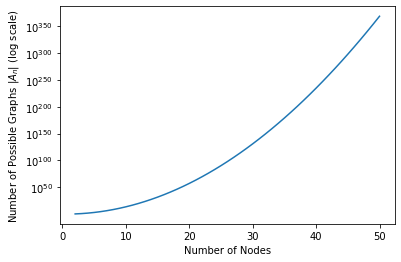

In [5]:

import seaborn as sns
import numpy as np
from math import comb


n = np.arange(2, 51)
logAn = np.array([comb(ni, 2) for ni in n])*np.log10(2)

ax = sns.lineplot(x=n, y=logAn)
ax.set_title("")
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Number of Possible Graphs $|A_n|$ (log scale)")
ax.set_yticks([50, 100, 150, 200, 250, 300, 350])
ax.set_yticklabels(["$10^{{{pow:d}}}$".format(pow=d) for d in [50, 100, 150, 200, 250, 300, 350]])
ax;

So, now we know that we have probability distributions on networks, and a set $\mathcal A_n$ which defines all of the adjacency matrices that every probability distribution must assign a probability to. Now, just what is a network model? A **network model** is a set $\mathcal P$ of probability distributions on $\mathcal A_n$. Stated another way, we can describe $\mathcal P$ to be:
\begin{align*}
    \mathcal P &\subseteq \{\mathbb P: \mathbb P\textrm{ is a probability distribution on }\mathcal A_n\}
\end{align*}

In general, we will simplify $\mathcal P$ through something called *parametrization*. We define $\Theta$ to be the set of all possible parameters of the random network model, and $\theta \in \Theta$ is a particular parameter choice that governs the parameters of a specific random network $\mathbf A$. In this case, we will write $\mathcal P$ as the set:
\begin{align*}
    \mathcal P(\Theta) &\triangleq \left\{\mathbb P_\theta : \theta \in \Theta\right\}
\end{align*}
If $\mathbf A$ is a random network that follows a network model, we will write that $\mathbf A \sim \mathbb P_\theta$, for some choice $\theta$. As above, if it is totally unambiguous what $\theta$ refers to, we will just use the shorthand $\mathbf A \sim \mathbb P$.

If you are used to traditional univariate or multivariate statistical modelling, an extremely natural choice for when you have a discrete sample space (like $\mathcal A_n$, which is discrete because we can count it) would be to use a categorical model. In the categorical model, we would have a single parameter for all possible configurations of an $n$-node network; that is, $|\theta| = \left|\mathcal A_n\right| = 2^{\binom n 2}$. What is wrong with this model? The limitations are two-fold:
1. As we explained previously, when $n$ is just $15$, we would need over $10^{30}$ bits of storage just to define $\theta$. This amounts to more than $10^{8}$ zetabytes, which exceeds the storage capacity of *the entire world*.
2. With a single network observed (or really, any number of networks we could collect in the real world) we would never be able to estimate $2^{\binom n 2}$ parameters for any reasonably non-trivial number of nodes $n$. For the case of one observed network $A$, an estimate of $\theta$ (referred to as $\hat\theta$) would simply be for $\hat\theta$ to have a $1$ in the entry corresponding to our observed network, and a $0$ everywhere else. Inferentially, this would imply that the random network $\mathbf A$ which governs realizations $A$ is deterministic, even if this is not the case. Even if we collected potentially *many* observed networks, we would still (with very high probability) just get $\hat \theta$ as a series of point masses on the observed networks we see, and $0$s everywhere else. This would mean our parameter estimates $\hat\theta$ would not generalize to new observations at *all*.

So, what are some more reasonable descriptions of $\mathcal P$? We explore some choices below. Particularly, we will be most interested in the *independent-edge* networks. These are the families of networks in which the generative procedure which governs the random networks assume that the edges of the network are generated *independently*. **Statistical Independence** is a property which greatly simplifies many of the modelling assumptions which are crucial for proper estimation and rigorous statistical inference, which we will learn more about in the later chapters.

### *Equivalence Classes

In all of the below models, we will explore the concept of the **likelihood equivalence class**, or an *equivalence class*, for short. The likelihood $\mathcal L$ is a function which in general, describes how effective a particular observation can be described by a random variable $\mathbf A$ with parameters $\theta$, written $\mathbf A \sim F(\theta)$. Formally, the likelihood is the function where $\mathcal L_\theta(A) \propto \mathbb P_\theta(A)$; that is, the likelihood is proportional to the probability of observing the realization $A$ if the underlying random variable $\mathbf A$ has parameters $\theta$.  Why does this matter when it comes to equivalence classes? An equivalence class is a subset of the sample space $E \subseteq \mathcal A_n$, which has the following properties. Holding the parameters $\theta$ fixed:

1. If $A$ and $A'$ are members of the same equivalence class $E$ (written $A, A' \in E$), then $\mathcal L_\theta(A) = \mathcal L_\theta(A')$. 
2. If $A$ and $A''$ are members of different equivalence classes; that is, $A \in E$ and $A'' \in E'$ where $E, E'$ are equivalence classes, then $\mathcal L_\theta(A) \neq \mathcal L_\theta(A'')$.
3. Using points 1. and 2., we can establish that if $E$ and $E'$ are two different equivalence classes, then $E \cap E' = \varnothing$. 
4. We can use the preceding properties to deduce that given the sample space $\mathcal A_n$ and a likelihood function $\mathcal L_\theta$, we can define a partition of the sample space into equivalence classes $E_i$, where $i \in \mathcal I$ is an arbitrary indexing set.

We will see more below about how the equivalence classes come into play with network models, and in a later section, we will see their relevance to the estimation of the parameters $\theta$.

## Erd&ouml;s-R&eacute;nyi (ER)

In [6]:
from graspologic.plot import heatmap
from graspologic.simulations import er_np

n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adj. mtx from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
binary_heatmap(A, title="$ER_{50}(0.3)$ Simulation")
plt.show()

NameError: name 'binary_heatmap' is not defined

The simplest random network model is called the Erd&ouml;s R&eacute;nyi (ER) model<sup>1</sup>. Consider the social network example explained above. The simplest possible thing to do with our network would be to assume that a given pair of people within our network have the same chance of being friends as any other pair of people we select. The Erd&ouml;s R&eacute;nyi model formalizes this relatively simple model with a single parameter:

| Parameter | Space | Description |
| --- | --- | --- |
| $p$ | $[0, 1]$ | Probability that an edge exists between a pair of nodes |

In an Erd&ouml;s R&eacute;nyi network, each pair of nodes is connected with probability $p$, and therefore not connected with probability $1-p$. Statistically, we say that for each edge $\mathbf{a}_{ij}$, that $\mathbf{a}_{ij}$ is sampled independently and identically from a $Bern(p)$ distribution, whenever $j > i$. The word "independent" means that edges in the network occurring or not occurring do not affect one another. For instance, this means that if we knew a student named Alice was friends with Bob, and Alice was also friends with Chadwick, that we do not learn any information about whether Bob is friends with Chadwick. The word "identical" means that every edge in the network has the same probability $p$ of being connected. If Alice and Bob are friends with probability $p$, then Alice/Bob and Chadwick are friends with probability $p$, too. When $i > j$, we allow $\mathbf a_{ij} = \mathbf a_{ji}$. This means that the connections *across the diagonal* of the adjacency matrix are all equal, which means that we have built-in the property of undirectedness into our networks. Also, we let $\mathbf a_{ii} = 0$, which means that all self-loops are always unconnected. This means that all the networks are loopless, and the adjacency matrices are hollow. If $\mathbf A$ is the adjacency matrix for an ER network with probability $p$, we write that $\mathbf A \sim ER_n(p)$.

### Practical Utility

In practice, the ER model seems like it might be a little too simple to be useful. Why would it ever be useful to think that the best we can do to describe our network is to say that connections exist with some probability? Does this miss a *lot* of useful questions we might want to answer? Fortunately, there are a number of ways in which the simplicity of the ER model is useful. Given a probability and a number of nodes, we can easily describe the properties we would expect to see in a network if that network were ER. For instance, we know what the degree distribution of an ER network should look like. We can reverse this idea, too: given a network we think might *not* be ER, we could check whether it's different in some way from a network which is ER. For instance, if we see a half of the nodes have a very high degree, and the rest of the nodes with a much lower degree, we can reasonably conclude the network might be more complex than can be described by the ER model. If this is the case, we might look for other, more complex, models that could describe our network.


```{admonition} Working Out the Expected Degree in an Erd&ouml;s-R&eacute;nyi Network
Suppose that $\mathbf A$ is a simple network which is random. The network has $n$ nodes $\mathcal V = (v_i)_{i = 1}^n$. Recall that the in a simple network, the node degree is $deg(v_i) = \sum_{j = 1}^n \mathbf a_{ij}$. What is the expected degree of a node $v_i$ of a random network $\mathbf A$ which is Erd&ouml;s-R&eacute;nyi?

To describe this, we will compute the expectated value of the degree $deg(v_i)$, written $\mathbb E\left[deg(v_i)\right]$. Let's see what happens:
\begin{align*}
    \mathbb E\left[deg(v_i)\right] &= \mathbb E\left[\sum_{j = 1}^n \mathbf a_{ij}\right] \\
    &= \sum_{j = 1}^n \mathbb E[\mathbf a_{ij}]
\end{align*}
We use the *linearity of expectation* in the line above, which means that the expectation of a sum with a finite number of terms being summed over ($n$, in this case) is the sum of the expectations. Finally, by definition, all of the edges $A_{ij}$ have the same distribution: $Bern(p)$. The expected value of a random quantity which takes a Bernoulli distribution is just the probability $p$. This means every term $\mathbb E[\mathbf a_{ij}] = p$. Therefore:
\begin{align*}
    \mathbb E\left[deg(v_i)\right] &= \sum_{j = 1}^n p = n\cdot p
\end{align*}
Since all of the $n$ terms being summed have the same expected value. This holds for *every* node $v_i$, which means that the expected degree of all nodes is an undirected ER network is the same.
```

<!-- The ER model is also useful for the development of new computational techniques to use on random networks. This is because even if the "best" model for a network is something much more complex, we can still calculate an edge probability $p$ for the network without needing any information but the adjacency matrix. Consider, for instance, a case where we design a new algorithm for a social network, and we want to know how much more RAM we might need as the social network grows. We might want to investigate how the algorithm scales to networks with different numbers of people and different connection probabilities that might be realistic as our social network expands in popularity. Examining how the algorithm operates on ER networks with different values of $n$ and $p$ might be helpful. This is an especially common approach when people deal with networks that are said to be *sparse*. A **sparse network** is a network in which the number of edges is much less than the total possible number of edges. This contrasts with a **dense network**, which is a network in which the number of edges is close to the maximum number of possible edges. In the case of an $ER_{n}(p)$ network, the network is sparse when $p$ is small (closer to $0$), and dense when $p$ is large (closer to $1$). -->

### Code Examples

In the next code block, we look to sample a single ER network with $50$ nodes and an edge probability $p$ of $0.3$:

In [7]:
from graspologic.plot import heatmap
from graspologic.simulations import er_np

n = 50  # network with 50 nodes
p = 0.3  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
binary_heatmap(A, title="$ER_{50}(0.3)$ Simulation")
plt.show()

NameError: name 'binary_heatmap' is not defined

Above, we visualize the network using a heatmap. The dark red squares indicate that an edge exists between a pair of nodes, and white squares indicate that an edge does not exist between a pair of nodes.

Next, let's see what happens when we use a higher edge probability, like $p=0.7$:

In [8]:
p = 0.7  # network has an edge probability of 0.7

# sample a single adj. mtx from ER(50, 0.7)
A = er_np(n=n, p=p, directed=False, loops=False)

# and plot it
binary_heatmap(A, title="$ER_{50}(0.7)$ Simulation")
plt.show()

NameError: name 'binary_heatmap' is not defined

As the edge probability increases, the sampled adjacency matrix tends to indicate that there are more connections in the network. This is because there is a higher chance of an edge existing when $p$ is larger.


### *Likelihood

What is the likelihood for realizations of Erd&ouml;s-R&eacute;nyi networks? Remember that the likelihood is proportional to the probability of observing a particular realization $A$ of a random network $\mathbf A$ given the parameters $\theta$. With $\theta = p$ (that is, an ER-random network has only a single parameter, the probability $p$) we get:

\begin{align*}
    \mathcal L_{\theta}(A) &\propto \mathbb P_{\theta}(\mathbf A = A) \\
    &= \mathbb P_{\theta}(\mathbf a_{11} = a_{11}, ..., \mathbf a_{1n} = a_{1n}, \mathbf a_{23} = a_{23}, ..., \mathbf a_{nn} = a_{nn}) \\
    &= \mathbb P_\theta(\mathbf a_{ij} = a_{ij} \;\forall j > i)
\end{align*}

Remember the fact that the entries of $\mathbf A$ are independent, which means that the probability that the network-valued random variable $\mathbf A$ takes the value $A$ is the product of the probabilities of the individual random adjacencies $\mathbf{a}_{ij}$ taking the values $a_{ij}$. Throughout the succeeding sections, we will call this the "Independence Assumption":

\begin{align*}
    \mathbb P_\theta(\mathbf a_{ij} = a_{ij} \;\forall j > i) &= \prod_{j > i} \mathbb P_\theta(\mathbf{a}_{ij} = a_{ij})
\end{align*}

Next, we recall that by assumption of the ER model, that $\mathbf{a}_{ij} \sim Bern(p)$ for all $\mathbf a_{ij}$, by the identical distribution assumption. Therefore, each $\mathbf a_{ij}$ takes the probability given by the probability mass function of a Bernoulli random variable, which is $\mathbb P(\mathbf{a}_{ij} = a_{ij}; p) = p^{a_{ij}}(1 - p)^{1 - a_{ij}}$. Finally, let $|\mathcal E|$ denote the number of edges present in the network, $\sum_{j > i} a_{ij}$. Therefore:

\begin{align*}
    \mathcal L_\theta(A) &\propto \prod_{j > i} p^{a_{ij}}(1 - p)^{1 - a_{ij}} \\
    &= p^{\sum_{j > i} a_{ij}} \cdot (1 - p)^{\binom{n}{2} - \sum_{j > i}a_{ij}} \\
    &= p^{m} \cdot (1 - p)^{\binom{n}{2} - m}
\end{align*}

This means that the likelihood $\mathcal L_\theta(A)$ is a function *only* of the number of edges $m = \sum_{j > i}a_{ij}$ in the network represented by adjacency matrix $A$. The equivalence class on the Erd&ouml;s-R&eacute;nyi networks are the sets:

\begin{align*}
    E_{i} &= \left\{A \in \mathcal A_n : m = i\right\}
\end{align*}

where $i$ index from $0$ (the minimum number of edges possible) all the way up to $n^2$ (the maximum number of edges possible). All of the relationships for equivalence classes discussed above apply to the sets $E_i$.

## Stochastic Block Model (SBM)

Imagine that we are flipping a fair single coin. A *fair* coin is a coin in which the probability of seeing either a heads or a tails on a coin flip is $\frac{1}{2}$. Let's imagine we flip the coin $20$ times, and we see $10$ heads and $10$ tails. 

What would happen if we were to flip $2$ coins, which had a different probability of seeing heads or tails? Imagine that we flip each coin ten times. The first ten flips are with a fair coin, and we might see an outcome of $5$ heads and $5$ tails. On the other hand, the second ten flips are not with a fair coin, but with a coin that has a $\frac{4}{5}$ probability to land on heads, and a $\frac{1}{5}$ probability of landing on tails. In the second set of $10$ flips, we might see an outcome of $9$ heads and $1$ tails.

In the first set of twenty coin flips, all of the coin flips are performed with the same coin. Stated another way, we have a single *cluster*, or a set of coin flips which are similar. On the other hand, in the second set of twenty coin flips, twenty of the coin flips are performed with a fair coin, and ten of the coin flips are performed with a different coin which is not fair. Here, we have two *clusters* of coin flips, those that occur with the first coin, and those that occur with the second coin. Since the first cluster of coin flips are with a fair coin, we expect that coin flips from the first cluster will not necessarily have an identical number of heads and tails, but at least a similar number of heads and tails. On the other hand, coin flips from the second cluster will tend to have more heads than tails. 

What does this example have to do with networks? In the above examples, the two sets of coin flips differ in the number of coins with different probabilities that we use for the example. The first example has only one unique coin, whereas the second example has two unique coins with different probabilities of heads or tails. If we were to assume that the second example had been performed with only a single coin when in reality it was performed with two different coins, we would be unable to capture that the second ten coin flips had a substantially different chance of landing on heads than the first ten coin flips. Just like coin flips can be performed with fundamentally different coins, the nodes of a network could also be fundamentally different. The way in which two nodes differ (or do not differ) sometimes holds value in determining the probability that an edge exists between them.

To generalize this example to a network, let's imagine that we have $100$ students, each of whom can go to one of two possible schools: school $1$ or school $2$. Our network has $100$ nodes, which each node represents a single student. The edges of this network represent whether a pair of students are friends. Logically, if two students go to the same school, it might make sense to say that they have a higher chance of being friends than if they do not go to the same school. If we were to try to characterize this network using an ER network, we would run into a problem very similar to when we tried to capture the two cluster coin flip example with only a single coin. Intuitively, there must be a better way!

The Stochastic Block Model, or SBM, captures this idea through the use of a node-assignment vector, which assigns each of the $n$ nodes in the network to one of $K$ communities. A **community** is a group of nodes within the network. In our example case, the communities would represent the schools that students are able to attend in our network. In an SBM, instead of describing all pairs of nodes by a fixed probability like with the ER model, we instead describe properties that hold for edges between *pairs of communities*.  In this sense, for a given pair of communities, the subgraph of edges that comprise these two communities behaves similar to an ER graph, described previously. There are two types of SBMs: one in which the node-assignment vector is treated as *unknown* and one in which the node-assignment vector is treated as *known (it is a *node attribute* for the network).

### *A Priori* Stochastic Block Model

The *a priori* SBM is an SBM in which we know *a priori* (that is, ahead of time) which nodes are in which node communities. Here, we will use the variable $K$ to denote the maximum number of communities that nodes could be assigned to. The ordering of the communities does not matter; the community we call $1$ versus $2$ versus $K$ is largely a symbolic distinction (the only thing that matters is that they are *different*). The *a priori* SBM and has the following two parameters:

| Parameter | Space | Description |
| --- | --- | --- |
| $\vec\tau$ | {1,...,K}$^n$ | The community assignment vector for each of the $n$ nodes to one of $K$ communities |
| $B$ | [0,1]$^{K \times K}$ | The block matrix, which assigns edge probabilities for pairs of communities |

We write that $\vec \tau \in \{1, ..., K\}^n$, which means that $\vec \tau$ is an $n$-dimensional vector which takes one of $K$ possible values. In our social network example, for instance, this vector would reflect the fact that each of the $n$ students in our network could be attendees at one of $K$ possible schools. For a single node $i$ that is in community $\ell$, where $\ell \in \{1, ..., K\}$, we write that $\tau_i = \ell$. 

Next, let's discuss the matrix $B$, which is known as the **block matrix** of the SBM. We write down that $B \in [0, 1]^{K \times K}$, which means that the block matrix is a matrix with $K$ rows and $K$ columns. If we have a pair of nodes and know which of the $K$ communities each node is from, the block matrix tells us the probability that those two nodes are connected. If our networks are simple, the matrix $B$ is also symmetric, which means that if $b_{k, \ell} = p$ where $p$ is a probability, that $b_{\ell, k} = p$, too. The requirement of $B$ to be symmetric exists *only* if we are dealing with simple networks, since they are undirected; if we relax the requirement of undirectedness (and allow directed networks) $B$ no longer need be symmetric.

Finally, let's think about how to write down the generative model for the *a priori* SBM. Remember that $\vec \tau$ and $B$ are parameters, which means that when we fit a SBM, we know these ahead of time. Intuitionally what we want to reflect is, if we know that node $i$ is in community $\ell$ and node $j$ is in community $k$, that the $(\ell, k)$ entry of the block matrix is the probability that $i$ and $j$ are connected. Given that  $\tau_i = \ell$ and $\tau_j = k$, $\mathbf a_{ij}$ is sampled independently from a $Bern(b_{\ell, k})$ distribution for all $j > i$.  If $\mathbf A$ is an *a priori* SBM network with parameters $\vec \tau$ and $B$, we write that $\mathbf A \sim SBM_n(\vec \tau, B)$.

### Code Examples

We just covered a lot of intuition that will be critical for understanding many of the later models, so let's work through an example. Say we have $300$ students, and we know that each student goes to one of two possible schools. We will begin by thinking about the *a priori* SBM, since it's a little more straightforward to generate samples. Remember the *a priori* SBM is the SBM where we know the node-assignment vector $\vec \tau$ ahead of time. We don't really care too much about the ordering of the students for now, so let's just assume that the first $150$ students all go to school $1$, and the second $150$ students all go to school $2$. Let's assume that the students from school $1$ are a little bit more closely knit than the students from school $2$, so we'll say that the probability of two students who both go to school $1$ being friends is $0.5$, and the probability of two students who both go to school $2$ being friends is $0.3$. Finally, let's assume that if one student goes to school $1$ and the other student goes to school $2$, that the probability that they are friends is $0.2$.

```{admonition} Thought Exercise

Before you read on, try to think to yourself about what the node-assignment vector $\vec \tau$ and the block matrix $B$ look like.
```

Next, let's plot what $\vec \tau$ and $B$ look like:

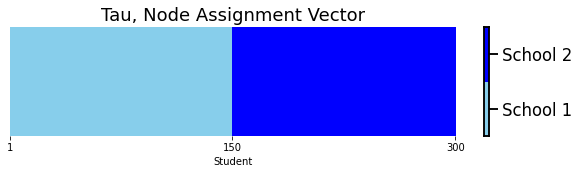

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

def plot_tau(tau, title="", xlab="Node"):
    cmap = matplotlib.colors.ListedColormap(["skyblue", 'blue'])
    fig, ax = plt.subplots(figsize=(10,2))
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap((tau - 1).reshape((1,tau.shape[0])), cmap=cmap,
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        cbar.set_ticks([0.25, .75])
        cbar.set_ticklabels(['School 1', 'School 2'])
        ax.set(xlabel=xlab)
        ax.set_xticks([.5,149.5,299.5])
        ax.set_xticklabels(["1", "150", "300"])
        cbar.ax.set_frame_on(True)
    return

n = 300  # number of students

# tau is a column vector of 150 1s followed by 50 2s
# this vector gives the school each of the 300 students are from
tau = np.vstack((np.ones((int(n/2),1)), np.full((int(n/2),1), 2)))

plot_tau(tau, title="Tau, Node Assignment Vector",
        xlab="Student")

So as we can see, the first $50$ students are from school $1$, and the second $50$ students are from school $2$. Next, let's look at the block matrix $B$: 

In [12]:
K = 2  # 2 communities in total
# construct the block matrix B as described above
B = np.zeros((K, K))
B[0,0] = .5
B[0,1] = B[1,0] = .2
B[1,1] = .3

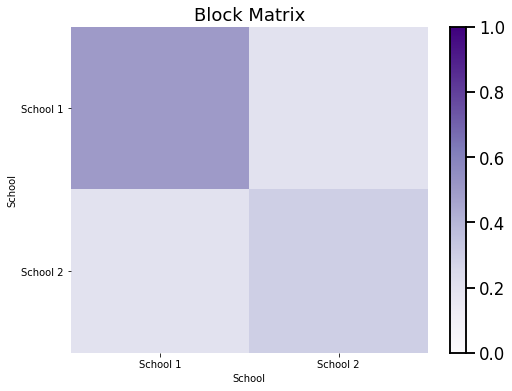

In [13]:

def plot_block(X, title="", blockname="School", blocktix=[0.5, 1.5],
               blocklabs=["School 1", "School 2"]):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=blockname, xlabel=blockname)
        ax.set_yticks(blocktix)
        ax.set_yticklabels(blocklabs)
        ax.set_xticks(blocktix)
        ax.set_xticklabels(blocklabs)
        cbar.ax.set_frame_on(True)
    return

plot_block(B, title="Block Matrix")
plt.show()

As we can see, the matrix $B$ is a symmetric block matrix, since our network is undirected. Finally, let's sample a single network from the SBM with parameters $\vec \tau$ and $B$:

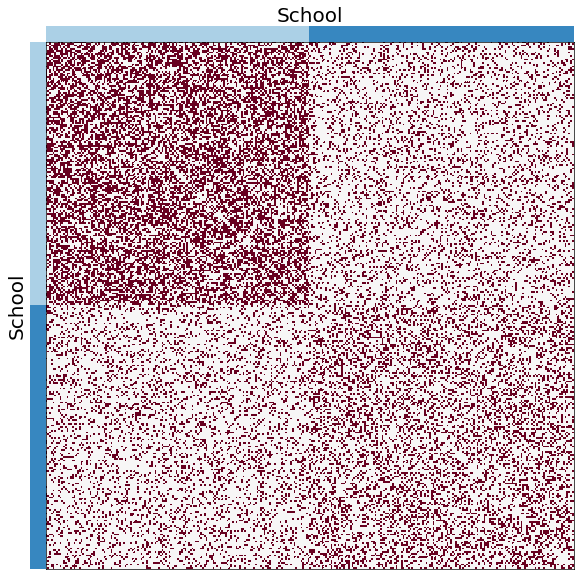

In [14]:
from graspologic.simulations import sbm
from graspologic.plot import adjplot
import pandas as pd

# sample a graph from SBM_{300}(tau, B)
A = sbm(n=[int(n/2), int(n/2)], p=B, directed=False, loops=False)
meta = pd.DataFrame(
    data = {"School": tau.reshape((n)).astype(int)}
)

ax=adjplot(A, meta=meta, color="School", palette="Blues")

The above network shows students, ordered by the school they are in (school 1 and school 2, respectively). As we can see in the above network, people from school $1$ are more connected than people from school $2$.  We notice this from the fact that there are more connections between people from school $1$ than from school $2$. Also, the connections between people from different schools appear to be a bit *more sparse* (fewer edges) than connections betwen schools. The above heatmap can be described as **modular**: it has clear communities, which are the nodes that comprise the obvious "squares" in the above adjacency matrix.

Something easy to mistake about the SBM is that the SBM will *not always* have the obvious modular structure defined above when we look at a heatmap. Rather, this modular structure is *only* made obvious because the students are ordered according to the school in which they are in. What do you think will happen if we look at the students in a random order? Do you think it will be obvious that the network will have a modular structure?

The answer is: *No!* Let's see what happens when we use an reordering, called a *permutation* of the nodes, to reorder the nodes from the network into a random order:

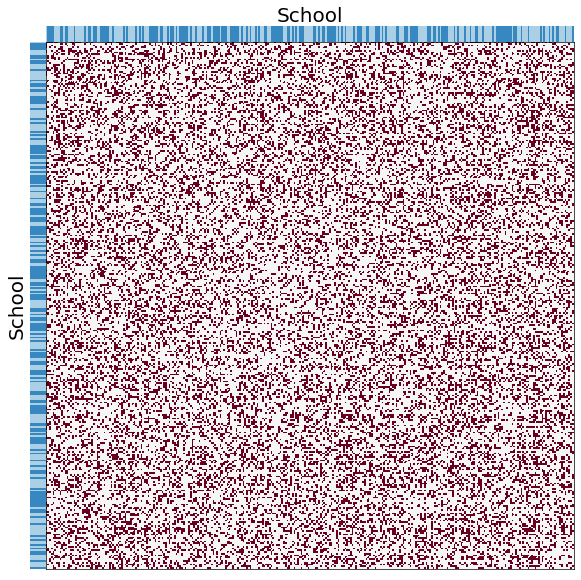

In [15]:
import numpy as np

# generate a permutation of the n nodes
vtx_perm = np.random.choice(n, size=n, replace=False)

meta = pd.DataFrame(
    data = {"School": tau[vtx_perm].reshape((n)).astype(int)}
)

# same adjacency matrix (up to reorder of the nodes)

ax=adjplot(A[tuple([vtx_perm])] [:,vtx_perm], meta=meta, color="School", palette="Blues")

Notice that now, the students are *not* organized according to school. We can see this by looking at the school assignment vector, shown at the left and top, of the network. It becomes pretty tough to figure out whether there are communities in our network just by looking at an adjacency matrix, unless you are looking at a network in which the nodes are *already arranged* in an order which respects the community structure. 

In practice, this means that if you know ahead of time what natural groupings of the nodes might be (such knowing which school each student goes to) by way of your node attributes, you can visualize your data according to that grouping. If you don't know anything about natural groupings of nodes, however, we are left with the problem of *estimating community structure*. A later method, called the *spectral embedding*, will be paired with clustering techniques to allow us to estimate node assignment vectors.

#### *Likelihood

What does the likelihood for the *a priori* SBM look like? Fortunately, since $\vec \tau$ is a *parameter* of the *a priori* SBM, the likelihood is a bit simpler than for the *a posteriori* SBM. This is because the *a posteriori* SBM requires a marginalization over potential realizations of $\vec{\pmb \tau}$, whereas the *a priori* SBM does not. First, remember that the edges are independent. This means that the probability that $\mathbf A = A$ can be split into the product of the probabilities that each entry $\mathbf a_{ij} = a_{ij}$. Next, remember that, given $\mathbf B$ and $\vec \tau$, that $\mathbf a_{ij}$ takes the distribution $Bern(b_{\ell k})$, where $\tau_i = \ell$ and $\tau_j = k$. Remember that the probability mass function of a Bernoulli R.V. is given by $\mathbb P(\mathbf x = x; p) = p^x (1 - p)^{1 - x}$. Putting these steps together gives us that:
\begin{align*}
\mathcal L_\theta(A) &\propto \mathbb P_{\theta}(\mathbf A = A) \\
&= \prod_{j > i} \mathbb P_\theta(\mathbf a_{ij} = a_{ij}),\;\;\;\;\textrm{Independence Assumption} \\
&= \prod_{j > i} b_{\ell k}^{a_{ij}}(1 - b_{\ell k})^{1 - a_{ij}},\;\;\;\;\textrm{p.m.f. of Bernoulli distribution} \\
&= \prod_{k, \ell}b_{\ell k}^{m_{\ell k}}(1 - b_{\ell k})^{n_{\ell k} - m_{\ell k}}
\end{align*}

Where $n_{\ell k}$ denotes the total number of edges possible between nodes assigned to community $\ell$ and nodes assigned to community $k$. That is, $n_{\ell k} = \sum_{j > i} \mathbb 1_{\tau_i = \ell}\mathbb 1_{\tau_j = k}$. Further, we will use $m_{\ell k}$ to denote the total number of edges observed in $A$. That is, $m_{\ell k} = \sum_{j > i}\mathbb 1_{\tau_i = l}\mathbb 1_{\tau_j = k}a_{ij}$. Note that for a single $(\ell,k)$ community pair, that the likelihood is analogous to the likelihood of a realization of an ER random variable.

<!--- We can formalize this a bit more explicitly. If we let $A^{\ell k}$ be defined as the subgraph *induced* by the edges incident nodes in community $\ell$ and those in community $k$, then we can say that $A^{\ell k}$ is a directed ER random network, --->

Like the ER model, there are again equivalence classes of the sample space $\mathcal A_n$ in terms of their likelihood. For a two-community setting, with $\vec \tau$ and $B$ given, the equivalence classes are the sets:
\begin{align*}
    E_{a,b,c}(\vec \tau, B) &= \left\{A \in \mathcal A_n : m_{11} = a, \mathcal E_{21}=m_{12} = b, m_{22} = c\right\}
\end{align*}

The number of equivalence classes possible scales with the number of communities, and the manner in which nodes are assigned to communities (particularly, the number of nodes in each community). 

### *A Posteriori* Stochastic Block Model

In the *a posteriori* Stochastic Block Model (SBM), we consider that node assignment to one of $K$ communities is a random process. This model has the following parameters:

| Parameter | Space | Description |
| --- | --- | --- |
| $\vec \pi$ | the $K-1$ probability simplex | The probability of a node being assigned to community $K$ |
| $B$ | [0,1]$^{K \times K}$ | The block matrix, which assigns edge probabilities for pairs of communities |

The *a posteriori* SBM is a bit more complicated than the *a priori* SBM. We will think about the *a posteriori* SBM as a variation of the *a priori* SBM, where instead of the node-assignment vector being treated as a fixed parameter, we will treat it as a vector-valued random variable. This vector-valued random variable, denoted by $\vec{\pmb \tau}$, is a *latent variable*, which means that in our real data, we don't actually get to see realizations of $\vec{\pmb \tau}$ itself. In this case, $\vec{\pmb \tau}$ takes values in the space $\{1,...,K\}^n$. This means that for a given realization of $\vec{\pmb \tau}$, denoted by $\vec \tau$, that for each of the $n$ nodes in the network, we suppose that an integer value between $1$ and $K$ indicates which community a node is from. Statistically, we write that the node assignment for node $i$, denoted by $\pmb \tau_i$, is sampled independently and identically from $Categorical(\vec \pi)$. Stated another way, the vector $\vec\pi$ indicates the probability $\pi_k$ of assignment to each community $k$ in the network.

The matrix $B$ behaves exactly the same as it did with the *a posteriori* SBM. Finally, let's think about how to write down the generative model in the *a posteriori* SBM. We showed above the model for the random node-assignment variable, $\vec{\pmb \tau}$, above. The model for edges of the *a posteriori* SBM is, in fact, conditional on the assignments obtained through this procedure. We write down that, conditioned on $\pmb \tau_i = \ell$ and $\pmb \tau_j = k$, that if $j > i$, $\mathbf a_{ij}$ is sampled independently from a $Bern(b_{\ell,k})$ distribution. What this reflects is the idea that, if node $i$ is in community $\ell$ and node $j$ is in community $k$, that the $(\ell,k)$ entry of the block matrix $B$ indicates the probability that nodes $i$ and $j$ are connected. Like the ER model, the edges are still independent, which means that edges occuring or not occuring do not have an impact on one another. Unlike above, we can no longer say that the $\mathbf a_{ij}$s are identically distributed, since the probability $b_{\ell, k}$ depends on the communities that nodes $i$ and $j$ are assigned to. This means that if we were to look at a different pair of nodes, the probability that the two nodes are connected could be different, and therefore they might not share the same distribution. If $\mathbf A$ is the adjacency matrix for an *a posteriori* SBM network with parameters $\vec \pi$ and $B$, we write that $\mathbf A \sim SBM_n(\vec \pi, B)$. 

#### *Likelihood

What does the likelihood for the *a posteriori* SBM look like? In this case, $\theta = (\vec \pi, B)$ are the parameters for the model, so the likelihood for a realization $A$ of $\mathbf A$ is:
\begin{align*}
\mathcal L_\theta(A) &\propto \mathbb P_\theta(\mathbf A = A)
\end{align*}
Next, we use the fact that the probability that $\mathbf A = A$ is, in fact, the *marginalization* (over realizations of $\vec{\pmb \tau}$) of the joint $(\mathbf A, \vec{\pmb \tau})$. In this case, we will let $\mathcal T = \{1,...,K\}^n$ be the space of all possible realizations that $\vec{\pmb \tau}$ could take. In the line after that, we use Bayes' Theorem to separate the joint probability into a conditional probability and a marginal probability:
\begin{align}
    &= \sum_{\vec \tau \in \mathcal T} \mathbb P_\theta(\mathbf A = A, \vec{\pmb \tau} = \vec \tau) \\
    &= \sum_{\vec \tau \in \mathcal T} \mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau)\mathbb P_\theta(\vec{\pmb \tau} = \vec \tau)
\end{align}
Let's think about each of these probabilities separately. Remember that for $\vec{\pmb \tau}$, that each entry $\pmb \tau_i$ is sampled *independently and identically* from $Categorical(\vec \pi)$.The probability mass for a $Categorical(\vec \pi)$-valued random variable is $\mathbb P(\pmb \tau_i = \tau_i; \vec \pi) = \pi_{\tau_i}$. Finally, note that if we are taking the products of $n$ $\pi_{\tau_i}$ terms, that many of these values will end up being the same. Consider, for instance, if the vector $\tau = [1,2,1,2,1]$. We end up with three terms of $\pi_1$, and two terms of $\pi_2$, and it does not matter which order we multiply them in. Rather, all we need to keep track of are the counts of each $\pi$. term. Written another way, we can use the indicator that $\tau_i = k$, given by $\mathbb 1_{\tau_i = k}$, and a running counter over all of the community probability assignments $\pi_k$ to make this expression a little more sensible. We will use the symbol $n_k = \sum_{i = 1}^n \mathbb 1_{\tau_i = k}$ to denote this value:
\begin{align*}
\mathbb P_\theta(\vec{\pmb \tau} = \vec \tau) &= \prod_{i = 1}^n \mathbb P_\theta(\pmb \tau_i = \tau_i),\;\;\;\;\textrm{Independence Assumption} \\
&= \prod_{i = 1}^n \pi_{\tau_i} ,\;\;\;\;\textrm{p.m.f. of a Categorical R.V.}\\
&= \prod_{k = 1}^K \pi_{k}^{n_k},\;\;\;\;\textrm{Reorganizing what we are taking products of}
\end{align*}
Next, let's think about the conditional probability term, $\mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau)$. Remember that the entries are all independent conditional on $\vec{\pmb \tau}$ taking the value $\vec\tau$. Just like with the *a priori* SBM, we can use the independence assumption to write this probability as the product of the entry-wise probabilities. Further, remember that conditional on $\pmb \tau_i = \ell$ and $\pmb \tau_j = k$, that $\mathbf a_{ij}$ is $Bern(b_{\ell,k})$. The distribution of $\mathbf a_{ij}$ does *not* depend on any of the other entries of $\vec{\pmb \tau}$. Finally, remembering the p.m.f. of a Bernoulli R.V. gives:
\begin{align*}
\mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau) &= \prod_{j > i}\mathbb P_\theta(\mathbf a_{ij} = a_{ij} \big | \vec{\pmb \tau} = \vec \tau),\;\;\;\;\textrm{Independence Assumption} \\
&= \prod_{j > i}\mathbb P_\theta(\mathbf a_{ij} = a_{ij} \big | \pmb \tau_i = \ell, \pmb \tau_j = k) ,\;\;\;\;\textrm{$\mathbf a_{ij}$ depends only on $\tau_i$ and $\tau_j$}\\
&= \prod_{j > i} b_{\ell k}^{a_{ij}} (1 - b_{\ell k})^{1 - a_{ij}}
\end{align*}
Again, we can simplify this expression a bit. Recall the indicator function above. Let $m_{\ell k}(A0$ and $n_{\ell k}$ be defined as above, with the same interpretations. This expression can be simplified to:
\begin{align*}
\mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau) &= \prod_{\ell,k} b_{\ell k}^{m_{\ell k}}(1 - b_{\ell k})^{n_{\ell k} - m_{\ell k}}
\end{align*}

Combining these into the integrand gives:
\begin{align*}
\mathcal L_\theta(A) &\propto \sum_{\vec \tau \in \mathcal T} \mathbb P_\theta(\mathbf A = A \big | \vec{\pmb \tau} = \vec \tau) \mathbb P_\theta(\vec{\pmb \tau} = \vec \tau) \\
&= \sum_{\vec \tau \in \mathcal T} \prod_{k = 1}^K \pi_k^{n_k}\cdot \prod_{\ell,k} b_{\ell k}^{m_{\ell k}}(1 - b_{\ell k})^{n_{\ell k} - m_{\ell k}}
\end{align*}

Evaluating this sum explicitly proves to be relatively tedious and is a bit outside of the scope of this book, so we will omit it here.

<!-- TODO: return to add equivalence classes -->

## Random Dot Product Graph (RDPG)

Let's imagine that we have a network which follows the *a priori* Stochastic Block Model. To make this example a little bit more concrete, let's borrow the code example from above. The nodes of our network represent each of the $300$ students in our network. The node assignment vector represents which of the two schools eaach student attends, where the first $150$ students attend school $1$, and the second $150$ students attend school $2$. Remember that $\tau$ and $B$ look like:

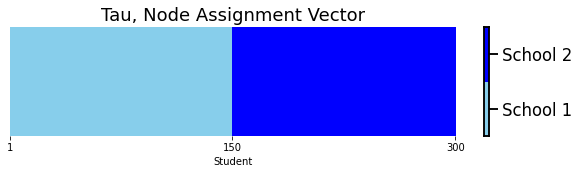

In [16]:
plot_tau(tau, title="Tau, Node Assignment Vector",
        xlab="Student");

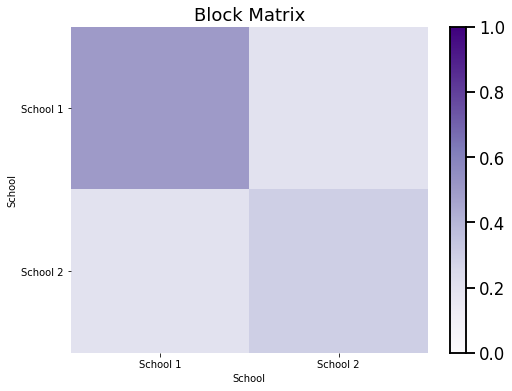

In [17]:
plot_block(B, title="Block Matrix")
plt.show()

Are there any other ways to describe this scenario, other than using both $\tau$ and $B$?

What if we were to look at the probabilities for *every* pair of edges? Remember, for a given $\tau$ and $B$, that a network which is SBM can be generated using the approach that, given that $\tau_i = \ell$ and $\tau_j = k$, that $\mathbf a_{ij} \sim Bern(b_{\ell k})$. That is, every entry is Bernoulli, with the probability indicated by appropriate entry of the block matrix corresponding to the pair of communities each node is in. However, there's another way we could write down this generative model. Suppose we had a $n \times n$ probability matrix, where for every $j > i$:
\begin{align*}
    p_{ji} = p_{ij}, p_{ij} = \begin{cases}
        b_{11} & \tau_i = 1, \tau_j = 1 \\
        b_{12} & \tau_i = 1, \tau_j = 2 \\
        b_{22} & \tau_i = 2, \tau_j = 1
    \end{cases}
\end{align*}
We will call the matrix $P$ the *probability matrix* whose $i^{th}$ row and $j^{th}$ column is the entry $p_{ij}$, as defined above. Stated another way, $P = (p_{ij})$. What does $P$ look like?

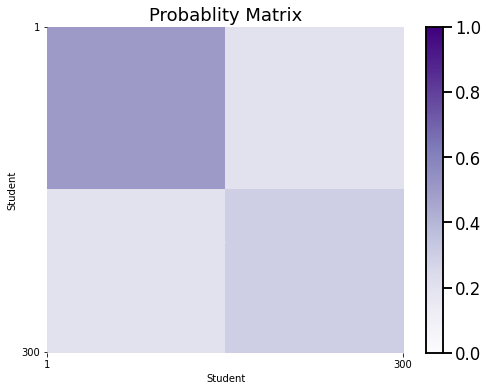

In [18]:
def plot_prob(X, title="", nodename="Student", nodetix=None,
             nodelabs=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=nodename, xlabel=nodename)
        if (nodetix is not None) and (nodelabs is not None):
            ax.set_yticks(nodetix)
            ax.set_yticklabels(nodelabs)
            ax.set_xticks(nodetix)
            ax.set_xticklabels(nodelabs)
        cbar.ax.set_frame_on(True)
    return

P = np.zeros((n,n))
P[0:150,0:150] = .5
P[150:300, 150:300] = .3
P[0:150,150:300] = .2
P[150:300,0:150] = .2

ax = plot_prob(P, title="Probablity Matrix", nodetix=[0,299],
              nodelabs=["1", "300"])
plt.show()

As we can see, $P$ captures a similar modular structure to the actual adjacency matrix corresponding to the SBM network. Also, $P$ captures the probability of connections between each pair of students. Indeed, it is the case that $P$ contains the information of both $\vec\tau$ and $B$. This means that we can write down a generative model by specifying *only* $P$, and we no longer need to specify $\vec\tau$ and $B$ at all. To write down the generative model in this way, we say that for all $j > i$, that $\mathbf a_{ij} \sim Bern(p_{ij})$ independently, where $\mathbf a_{ji} = \mathbf a_{ij}$, and $\mathbf a_{ii} = 0$.

What is so special about this formulation of the SBM problem? As it turns out, for a *symmetric* probability matrix $P$, $P$ can be decomposed using a matrix $X$, where $P = X X^\top$. We will call a single row of $X$ the vector $\vec x_i$. Remember, using this expression, each entry $p_{ij}$ is the product $\vec x_i^\top \vec x_j$, for all $i, j$. Like $P$, $X$ has $n$ rows, each of which corresponds to a single node in our network. However, the special property of $X$ is that it doesn't *necessarily* have $n$ columns: rather, $X$ often will have many fewer columns than rows. For instance, with $P$ defined as above, there in fact exists an $X$ with just $2$ columns that can be used to describe $P$. This matrix $X$ will be called the *latent position matrix*, and each row $\vec x_i$ will be called the *latent position of a node*. Like previously, there are two types of RDPGs: one in which $X$ is treated as *known*, and another in which $X$ is treated as *unknown*.

Now, your next thought might be that this requires a *lot* more space to represent an SBM network, and you'd be right: $\vec \tau$ has $n$ entries, and $B$ has $K \times K$ entries, where $K$ is typically much smaller than $n$. On the other hand, in this formulation, $P$ has $\binom{n}{2}$ entries, which is much bigger than $n + K \times K$ (since $K$ is usually much smaller than $n$). The advantage is that under this formulation, $P$ doesn't need to have this rigorous modular structure characteristic of SBM networks, and can look a *lot* more interesting. As we will see in later chapters, this network representation will prove extremely flexible for allowing us to capture networks that are fairly complex. Further, we can also perform analysis on the matrix $X$ itself, which will prove very useful for estimation of SBMs.

### *A Priori* RDPG

The *a priori* Random Dot Product Graph is an RDPG in which we know *a priori* the latent position matrix $X$. The *a priori* RDPG has the following parameter:

| Parameter | Space | Description |
| --- | --- | --- |
| $X$ | $ \mathbb R^{n \times d}$ | The matrix of latent positions for each node $n$. |

$X$ is called the **latent position matrix** of the RDPG. We write that $X \in \mathbb R^{n \times d}$, which means that it is a matrix with real values, $n$ rows, and $d$ columns. We will use the notation $\vec x_i$ to refer to the $i^{th}$ row of $X$. $\vec x_i$ is referred to as the **latent position** of a node $i$. Visually, this looks something like this:
\begin{align*}
    X = \begin{bmatrix}
     \vec x_{1}^\top \\
     \vdots \\
     \vec x_n^\top
    \end{bmatrix}
\end{align*}
Noting that $X$ has $d$ columns, this implies that $\vec x_i \in  \mathbb R^d$, or that each node's latent position is a real-valued $d$-dimensional vector.

What is the generative model for the *a priori* RDPG? As we discussed above, given $X$, for all $j > i$, $\mathbf a_{ij} \sim Bern(\vec x_i^\top \vec x_j)$ independently. If $i < j$, $\mathbf a_{ji} = \mathbf a_{ij}$ (*symmetry*), and $\mathbf a_{ii} = 0$ (*hollow*). If $\mathbf A$ is an *a priori* RDPG with parameter $X$, we write that $\mathbf A \sim RDPG_n(X)$. 

#### Code Examples

We will let $X$ be a little more complex than in our preceding example. Our $X$ will produce a $P$ that still *somewhat* has a modular structure, but not quite as much as before. Let's assume, for instance, that we have $300$ people who live along a very long road that is $100$ miles long, and each person is $\frac{1}{3}$ of a mile apart. The nodes of our network represent the people who live along our assumed street. If two people are closer to one another, it might make sense to think that they have a higher probability of being friends. If two people are neighbors, we think that they will have a very high probability of being connected (almost $1$) and when people are very far apart, we think that they will have a very low probability of being connected (almost $0$). What could we use for $X$?

One possible approach would be to let each $\vec x_i$ be defined as follows:
\begin{align*}
    \vec x_i = \begin{bmatrix}
        \frac{300 - i}{300} \\
        \frac{i}{300}
    \end{bmatrix}
\end{align*}
For instance, $\vec x_1 = \begin{bmatrix}1 \\ 0\end{bmatrix}$, and $\vec x_{300} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$. Note that:
\begin{align*}
p_{1,300} = \vec x_1^\top \vec x_j = 1 \cdot 0 + 0 \cdot 1 = 0
\end{align*}
What happens in between?

Let's consider another person, person $100$. Note that person $100$ lives closer to person $1$ than to person $300$.  Here, $\vec x_{100} = \begin{bmatrix} \frac{2}{3}\\ \frac{1}{3}\end{bmatrix}$. This gives us that:
\begin{align*}
p_{1,100} &= \vec x_1^\top \vec x_{100} = \frac{2}{3}\cdot 1 + 0 \cdot \frac{1}{3} = \frac{2}{3} \\
p_{100, 300} &= \vec x_{100}^\top x_{300} = \frac{2}{3} \cdot 0 + \frac 1 3 \cdot 1 = \frac 1 3
\end{align*}

This time, person $200$ lives closer to person $300$ than person $100$. With $\vec x_{200} = \begin{bmatrix}\frac{1}{3} \\ \frac{2}{3} \end{bmatrix}$, we obtain that:
\begin{align*}
p_{1,200} &= \vec x_1^\top \vec x_{200} = \frac{1}{3}\cdot 1 + 0 \cdot \frac{2}{3} = \frac{1}{3} \\
p_{200, 300} &= \vec x_{100}^\top x_{300} = \frac{1}{3} \cdot 0 + \frac 2 3 \cdot 1 = \frac 2 3 \\
p_{100,200} &= \vec x_{100}^\top x_{200} = \frac{2}{3} \cdot \frac 1 3 + \frac 1 3 \cdot \frac 2 3 = \frac 4 9
\end{align*}
So, intuitively, it seems like our probability matrix $P$ will capture the intuitive idea we described above. First, we'll take a look at $X$, and then we'll look at $P$:

In [19]:
n = 300  # the number of nodes in our network

# design the latent position matrix X according to 
# the rules we laid out previously
X = np.zeros((n,2))
for i in range(0, n):
    X[i,:] = [(n - i)/n, i/n]

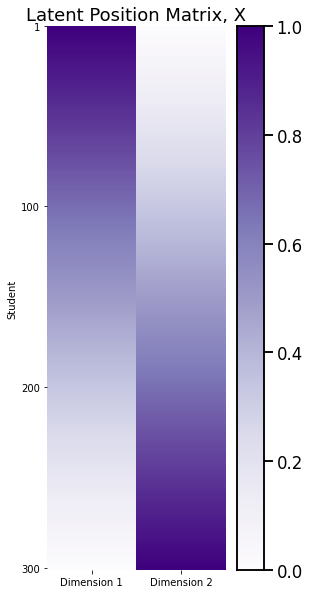

In [20]:
def plot_lp(X, title="", ylab="Student"):
    fig, ax = plt.subplots(figsize=(4, 10))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=ylab)
        ax.set_yticks([0, 99, 199, 299])
        ax.set_yticklabels(["1", "100", "200", "300"])
        ax.set_xticks([.5, 1.5])
        ax.set_xticklabels(["Dimension 1", "Dimension 2"])
        cbar.ax.set_frame_on(True)
    return

plot_lp(X, title="Latent Position Matrix, X")

The latent position matrix $X$ that we plotted above is $n \times d$ dimensions. There are a number of approaches, other than looking at a heatmap of $X$, with which we can visualize $X$ to derive insights as to its structure. When $d=2$, another popular visualization is to look at the latent position vectors, $\vec x_i$, as individual points in $2$-dimensional space. This will give us a scatter plot of $n$ points, each of which has two coordinates:

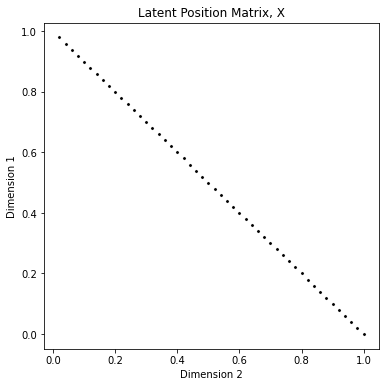

In [34]:
def plot_latents(latent_positions, title=None, labels=None, **kwargs):
    fig, ax = plt.subplots(figsize=(6, 6))
    if ax is None:
        ax = plt.gca()
    ss = 6*np.arange(0, 50)
    plot = sns.scatterplot(x=latent_positions[ss, 0], y=latent_positions[ss, 1], hue=labels, 
                           s=10, ax=ax, palette="Set1", color='k', **kwargs)
    ax.set_title(title)
    ax.set(ylabel="Dimension 1", xlabel="Dimension 2")
    ax.set_title(title)
    return plot

# plot
plot_latents(X, title="Latent Position Matrix, X");

The above scatter plot has been subsampled to show only every $6^{th}$ latent position vector, so that the individual $2$-dimensional latent position vectors are discernable. Due to the way we constructed $X$, the scatter plot would otherwise appear to be a line (due to points overlapping one another). The reason that the points fall along a vertical line when plotted as a vector is due to the method we used to construct entries of $X$, described above. Next, we will look at the probability matrix:

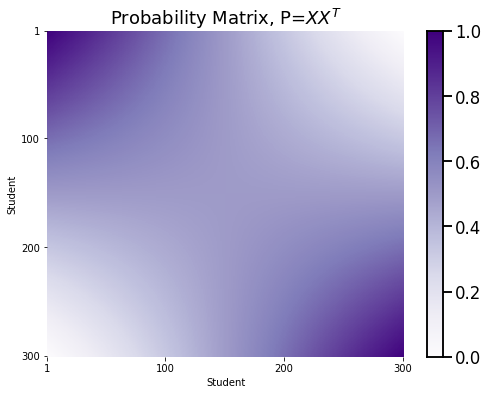

In [185]:
plot_prob(X.dot(X.transpose()), title="Probability Matrix, P=$XX^T$",
         nodelabs=["1", "100", "200", "300"], nodetix=[0,99,199,299])

Finally, we will sample an RDPG:

### *Likelihood

Given $X$, the likelihood for an RDPG is relatively straightforward. The independence assumption vastly simplifies our resulting expression. We will also use many of the results we've identified above, such as the p.m.f. of a Bernoulli random variable:

\begin{align*}
    \mathcal L_\theta(A) &\propto \mathbb P_\theta(A) \\
    &= \prod_{j > i}\mathbb P(\mathbf a_{ij} = a_{ij}),\;\;\;\; \textrm{Independence Assumption} \\
    &= \prod_{j > i}(\vec x_i^\top \vec x_j)^{a_{ij}}(1 - \vec x_i^\top \vec x_j)^{1 - a_{ij}},\;\;\;\; a_{ij} \sim Bern(\vec x_i^\top \vec x_j)
\end{align*}

Unfortunately, the likelihood equivalence classes are a bit harder to understand intuitionally here compared to the ER and SBM examples so we won't write them down here, but they still exist!

### *A Posteriori* RDPG

The *a posteriori* RDPG is to the *a priori* RDPG what the *a posteriori* SBM was to the *a priori* SBM. Formally, we instead suppose that we do *not* know the latent position matrix $X$, but instead know how we can characterize the individual latent position vectors. We have the following parameter:

| Parameter | Space | Description |
| --- | --- | --- |
| F | inner-product distributions | A distribution for each latent position vector. |

The parameter $F$ is what is known as an **inner-product distribution**. In the simplest case, we will assume that $F$ is a distribution on a subset of the possible real vectors that have $d$-dimensions with an important caveat: for any two vectors within this subset, their inner product *must* be a probability. We will refer to the subset of the possible real vectors as $\mathcal X_d$, which is a subset of $\mathbb R^d$. This means that for any $\vec x_i, \vec x_j$ that are in $\mathcal X_d$, it is always the case that $\vec x_i^\top \vec x_j$ is between $0$ and $1$. This is essential because like previously, we will describe the distribution of each edge in the adjacency matrix using $\vec x_i^\top \vec x_j$. Next, we will treat the latent position matrix as a matrix-valued random variable which is *latent* (remember, *latent* means that we don't get to see it in our real data). Like before, we will call $\vec{\mathbf x}_i$ the random latent position vectors for the nodes of our network. In this case, each $\vec {\mathbf x}_i$ is sampled independently and identically from the inner-product distribution $F$ described above. The latent-position matrix is the matrix-valued random variable $\mathbf X$ whose entries are the latent vectors $\vec {\mathbf x}_i$, for each of the $n$ nodes. 

The model for edges of the *a posteriori* RDPG can be described by conditioning n this unobserved latent-position matrix. We write down that, conditioned on $\vec {\mathbf x}_i = \vec x$ and $\vec {\mathbf x}_j = \vec y$, that if $j > i$, then $\mathbf a_{ij}$ is sampled independently from a $Bern(\vec x^\top \vec y)$ distribution. As before, if $i < j$, $\mathbf a_{ji} = \mathbf a_{ij}$ (*symmetry*), and $\mathbf a_{ii} = 0$ (*hollow*). If $\mathbf A$ is the adjacency matrix for an *a posteriori* RDPG with parameter $F$, we write that $\mathbf A \sim RDPG_n(F)$. 

#### *Likelihood

The likelihood for the *a posteriori* RDPG is fairly complicated. This is because, like the *a posteriori* SBM, we do not actually get to see the latent position matrix $\mathbf X$, so we need to use *marginalization* to obtain an expression for the likelihood. Here, we are concerned with realizations of $\mathbf X$. Remember that $\mathbf X$ is just a matrix whose rows are $\vec {\mathbf x}_i$, each of which individually have have the distribution $F$; e.g., $\vec{\mathbf x}_i \sim F$. For simplicity, we will assume that $F$ is a disrete distribution on $\mathcal X_d$. This makes the logic of what is going on below much simpler since the notation gets less complicated, but does not detract from the generalizability of the result (the only difference is that sums would be replaced by multivariate integrals, and probability mass functions replaced by probability density functions). 

We will let $p$ denote the probability mass function (p.m.f.) of this discrete distribution function $F$. The strategy will be to use the independence assumption, followed by marginalization over the relevant rows of $\mathbf X$:

\begin{align*}
\mathcal L_\theta(A) &\propto \mathbb P_\theta(\mathbf A = A) \\
&= \prod_{j > i} \mathbb P(\mathbf a_{ij} = a_{ij}), \;\;\;\;\textrm{Independence Assumption} \\
\mathbb P(\mathbf a_{ij} = a_{ij})&= \sum_{\vec x \in \mathcal X_d}\sum_{\vec y \in \mathcal X_d}\mathbb P(\mathbf a_{ij} = a_{ij}, \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y),\;\;\;\;\textrm{Marginalization over }\vec {\mathbf x}_i \textrm{ and }\vec {\mathbf x}_j
\end{align*}
Next, we will simplify this expression a little bit more, but using Bayes' Theorem two times:

\begin{align*}
\\
\mathbb P(\mathbf a_{ij} = a_{ij}, \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y) &= \mathbb P(\mathbf a_{ij} = a_{ij}| \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y) \mathbb P(\vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y) \\
&= \mathbb P(\mathbf a_{ij} = a_{ij}| \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y) \mathbb P(\vec{\mathbf x}_i = \vec x| \vec{\mathbf x}_j = \vec y) \mathbb P(\vec{\mathbf x}_j = \vec y)
\end{align*}

Next, we we use a relatively clever application of Bayes' theorem, and the definition of a conditional probability. Remember that for two discrete random variables $\mathbf a$ and $\mathbf b$, that the conditional probability of $\mathbf a$ taking the value $a$ given that $\mathbf b = b$ is defined as:

\begin{align*}
    \mathbb P(\mathbf a = a| \mathbf b = b) &= \frac{\mathbb P(\mathbf a = a, \mathbf b = b)}{\mathbb P(\mathbf b = b)}
\end{align*}
Further, remember that if $\mathbf a$ and $\mathbf b$ are independent, then $\mathbb P(\mathbf a = a, \mathbf b = b) = \mathbb P(\mathbf a = a)\mathbb P(\mathbf b = b)$. Using this fact:

\begin{align*}
    \mathbb P(\mathbf a = a| \mathbf b = b) &= \frac{\mathbb P(\mathbf a = a)\mathbb P(\mathbf b = b)}{\mathbb P(\mathbf b = b)},\;\;\;\;\textrm{Independence} \\
    \Rightarrow \mathbb P(\mathbf a = a)\mathbb P(\mathbf b = b) &= \mathbb P(\mathbf a = a| \mathbf b = b)\mathbb P(\mathbf b = b)
\end{align*}

We will use this result, combined with the fact that $\vec {\mathbf x}_i$ and $\vec {\mathbf x}_j$ are independent, to greatly simplify the expression we had before. Note that with this fact, we obtain that:

\begin{align*}
\mathbb P(\vec{\mathbf x}_i = \vec x) \mathbb P(\vec{\mathbf x}_j = \vec y) &= \mathbb P(\vec{\mathbf x}_i = \vec x| \vec{\mathbf x}_j = \vec y) \mathbb P(\vec{\mathbf x}_j = \vec y)
\end{align*}

Which means that:

\begin{align*}
\mathbb P(\mathbf a_{ij} = a_{ij}, \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y) &=  \mathbb P(\mathbf a_{ij} = a_{ij} | \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y)\mathbb P(\vec{\mathbf x}_i = \vec x) \mathbb P(\vec{\mathbf x}_j = \vec y)
\end{align*}
Finally, using that $\mathbf a_{ij}$ is a Bernoulli R.V. conditional on $\vec {\mathbf x}_i$ and $\vec{\mathbf x}_j$, and that $\vec{\mathbf x}_i$ and $\vec{\mathbf x}_j$ have p.m.f. $p$, we obtain:

\begin{align*}
\mathbb P(\mathbf a_{ij} = a_{ij}, \vec{\mathbf x}_i = \vec x, \vec{\mathbf x}_j = \vec y) &=  (\vec x^\top \vec y)^{a_{ij}}(1 - \vec x^\top\vec y)^{1 - a_{ij}}\mathbb P(\vec{\mathbf x}_i = \vec x) \mathbb P(\vec{\mathbf x}_j = \vec y),\;\;\;\;\mathbf a_{ij}|\vec x, \vec{y}\textrm{ has $Bern(\vec x^\top \vec y)$ distribution} \\
&=  (\vec x^\top \vec y)^{a_{ij}}(1 - \vec x^\top\vec y)^{1 - a_{ij}}p(\vec x)p(\vec y),\;\;\;\;\vec{\mathbf x}_i, \vec{\mathbf x}_j\textrm{ have p.m.f. $p$}
\end{align*}

So our complete expression for the likelihood is:

\begin{align*}
\mathcal L_\theta(A) &\propto \prod_{j > i}\sum_{\vec x \in \mathcal X_d}\sum_{\vec y \in \mathcal X_d} (\vec x^\top \vec y)^{a_{ij}}(1 - \vec x^\top\vec y)^{1 - a_{ij}}p(\vec x)p(\vec y)
\end{align*}

## Inhomogeneous Erd&ouml;s-R&eacute;nyi (IER)

In the preceding models, we typically made assumptions about how we could characterize the edge-existence probabilities using fewer than $\binom n 2$ unique probabilities (one for each edge). The reason for this is that in general, $n$ is usually relatively large, so attempting to actually learn $\binom n 2$ unique probabilities is not, in general, going to be very feasible (it is *never* feasible when we have a single network, since a single network only has $\binom n 2$ unique observed values). Further, it is relatively difficult to ask questions for which assuming edges share *nothing* in common (even if they don't share the same probabilities, there may be properties underlying the probabilities, such as the *latent positions* that we saw above with the RDPG, that we might still want to characterize) is actually favorable.


Nonetheless, the most general model for an independent-edge random network is known as the Inhomogeneous Erd&ouml;s-R&eacute;nyi (IER) Random Network. An IER Random Network is characterized by the following parameters:

| Parameter | Space | Description |
| --- | --- | --- |
| $P$ | [0,1]$^{n \times n}$ | The edge probability matrix. |

The probability matrix $P$ is an $n \times n$ matrix, where each entry $p_{ij}$ is a probability (a value between $0$ and $1$). Further, if we restrict ourselves to the case of simple networks like we have done so far, $P$ will also be symmetric ($p_{ij} = p_{ji}$ for all $i$ and $j$). The generative model is similar to the preceding models we have seen: given the $(i, j)$ entry of $P$, denoted $p_{ij}$, the edges $\mathbf a_{ij}$ are independent $Bern(p_{ij})$, for any $j > i$. Further, $\mathbf a_{ii} = 0$ for all $i$ (hollow adjacency matrix, and loopless network), and $\mathbf a_{ji} = \mathbf a_{ij}$ (symmetric adjacency matrix, and undirected network). If $\mathbf A$ is the adjacency maatrix for an IER network with probability matarix $P$, we write that $\mathbf A \sim IER_n(P)$.

It is worth noting that *all* of the preceding models we have discussed so far are special cases of the IER model. This means that, for instance, if we were to consider only the probability matrices where all of the entries are the same, we could represent the ER models. Similarly, if we were to only to consider the probability matrices $P$ where $P = XX^\top$, we could represent any RDPG.

### *Likelihood

The likelihood for a network which is IER is very straightforward. We use the independence assumption, and the p.m.f. of a Bernoulli-distributed random-variable $\mathbf a_{ij}$:

\begin{align*}
    \mathcal L_\theta(A) &\propto \mathbb P(\mathbf A = A) \\
    &= \prod_{j > i}p_{ij}^{a_{ij}}(1 - p_{ij})^{1 - a_{ij}}
\end{align*}

## Degree-Corrected Stochastic Block Model (DCSBM)

Let's think back to our school example for the Stochastic Block Model. Remember, we had 100 students, each of whom could go to one of two possible schools: school one or school two. Our network had 100 nodes, representing each of the students. We said that the school for which each student attended was represented by their node assignment $\tau_i$ to one of two possible communities. The matrix $B$ was the block probaability matrix, where $b_{11}$ was the probability that students in school one were friends, $b_{22}$ was the probability that students in school two were friends, and $b_{12} = b_{21}$ was the probability that students were friends if they did not go to the same school. In this case, we said that $\mathbf A \sim SBM_n(\tau, B)$. 

What is a scenario in which this model might not make sense? Let's say that Alice and Bob both go to the same school, but Alice is more popular than Bob. If we were to look at a schoolmate Chadwick, it might not make sense to say that both Alice and Bob have the *same* probability of being friends with Chadwick. Rather, we might want to reflect that Alice has a higher probability of being friends with an arbitrary schoolmate than Bob. The problem here is that within a single community of an SBM, the SBM assumes that the **node degree** (which we examined for the ER network) is the *same* for all nodes within a single community. 


```{admonition} Degree Homogeneity in a Stochastic Block Model Network
Suppose that $\mathbf A \sim SBM_n(\tau, B)$, where $\mathbf A$ has $K=2$ communities. What is the node degree of each node in $\mathbf A$?

For an arbitrary node $v_i$ which is in community $k$ (either $1$ or $2$), we will compute the expectated value of the degree $deg(v_i)$, written $\mathbb E\left[deg(v_i); \tau_i = k\right]$. We will let $n_k$ represent the number of nodes whose node assignments $\tau_i$ are to community $k$. Let's see what happens:
\begin{align*}
    \mathbb E\left[deg(v_i); \tau_i = k\right] &= \mathbb E\left[\sum_{j = 1}^n \mathbf a_{ij}\right] \\
    &= \sum_{j = 1}^n \mathbb E[\mathbf a_{ij}]
\end{align*}
We use the *linearity of expectation* again to get from the top line to the second line. Next, instead of summing over all the vertices, we'll break the sum up into the vertices which are in the same community as node $i$, and the ones in the *other* community $k'$. We use the notation $k'$ to emphasize that $k$ and $k'$ are different values: 

\begin{align*}
    \mathbb E\left[deg(v_i); \tau_i = k\right] &= \sum_{j : i \neq j, \tau_j = k} \mathbb E\left[\mathbf a_{ij}\right] + \sum_{j : \tau_j = \ell} \mathbb E[\mathbf a_{ij}]
\end{align*}
In the first sum, we have $n_k-1$ total edges (the number of nodes that aren't node $i$, but are in the same community), and in the second sum, we have $n_{k'}$ total edges (the number of nodes that are in the other community). Finally, we will use that the probability of an edge in the same community is $b_{kk}$, but the probability of an edge between the communities is $b_{k' k}$. Finally, we will use that the expected value of an adjacency $\mathbf a_{ij}$ which is Bernoulli distributed is its probability:
\begin{align*}
    \mathbb E\left[deg(v_i); \tau_i = k\right] &= \sum_{j : i \neq j, \tau_j = k} b_{kk} + \sum_{j : \tau_j = \ell} b_{kk'},\;\;\;\;\mathbf a_{ij}\textrm{ are Bernoulli distributed} \\
    &= (n_k - 1)b_{kk} + n_{k'} b_{kk'}
\end{align*}
This holds for any node $i$ which is in community $k$. Therefore, the node degree is the same, or **homogeneous**, within a community of an SBM.
```

To address this limitation, we turn to the Degree-Corrected Stochastic Block Model, or DCSBM. As with the Stochastic Block Model, there is both a *a priori* and *a posteriori* DCSBM.

### *A Priori* DCSBM

Like the *a priori* SBM, the *a priori* DCSBM is where we know which nodes are in which node communities ahead of time. Here, we will use the variable $K$ to denote the maximum number of communities that nodes could be assigned to. The *a priori* DCSBM and has the following two parameters:

| Parameter | Space | Description |
| --- | --- | --- |
| $\vec\tau$ | {1,...,K}$^n$ | The community assignment vector for each of the $n$ nodes to one of $K$ communities |
| $B$ | [0,1]$^{K \times K}$ | The block matrix, which assigns edge probabilities for pairs of communities |
| $\vec\theta$ | $\mathbb R^n_+$ | The degree correction vector, which adjusts the degree for pairs of nodes |

We write that $\vec \tau \in \{1, ..., K\}^n$, which means that $\vec \tau$ is an $n$-dimensional vector which takes one of $K$ possible values. In our social network example, for instance, this vector would reflect the fact that each of the $n$ students in our network could be attendees at one of $K$ possible schools. For a single node $i$ that is in community $\ell$, where $\ell \in \{1, ..., K\}$, we write that $\tau_i = \ell$. 

Like for the SBM, $B$ is the **block matrix** of the DCSBM. We write down that $B \in [0, 1]^{K \times K}$, which means that the block matrix is a matrix with $K$ rows and $K$ columns. If we have a pair of nodes and know which of the $K$ communities each node is from, the block matrix tells us the probability that those two nodes are connected. If our networks are simple, the matrix $B$ is also symmetric, which means that if $b_{k, \ell} = p$ where $p$ is a probability, that $b_{\ell, k} = p$, too. The requirement of $B$ to be symmetric exists *only* if we are dealing with simple networks, since they are undirected; if we relax the requirement of undirectedness (and allow directed networks) $B$ no longer need be symmetric.

The vector $\vec\theta$ is the degree correction vector. Each entry $\theta_i$ is a positive scalar. For every adjacency for a given node $i$, the degree correction $\theta_i$ will indicate the factor by which the probability for an adjacency which represents an edge incident node $i$ is adjusted.

Finally, let's think about how to write down the generative model for the *a priori* DCSBM. We say that $\tau_i = \ell$ and $\tau_j = k$, $\mathbf a_{ij}$ is sampled independently from a $Bern(\theta_i \theta_j b_{\ell, k})$ distribution for all $j > i$. As we can see, $\theta_i$ in a sense is "correcting" the probabilities of each adjacency to node $i$ to be higher, or lower, depending on the value of $\theta_i$ that that which is given by the block probabilities $b_{\ell k}$. If $\mathbf A$ is an *a priori* SBM network with parameters $\vec \tau$ and $B$, we write that $\mathbf A \sim DCSBM_n(\vec \tau, B)$.

## Network Models for Networks which aren't Simple

To make the discussions a little more easy to handle, in the above descriptions, we described network models for simple networks, which to recap, are binary networks which are both loopless and undirected. Stated another way, simple networks are networks whose adjacency matrices are only $0$s and $1$s, they are hollow, and symmetric. What happens our networks don't quite look this way?

For now, we'll keep the assumption that the networks are binary, but we will discuss non-binary network models in a later chapter. We have three possibilities we can consider, and we will show how the "relaxations" of the assumptions change a description of a network model. We split these out so we can be as clear as possible about how the generative model changes.

We will compare each relaxation to the statement about the generative model for the ER generative model. To recap, for a simple network, we wrote:

Statistically, we say that for each edge $\mathbf{a}_{ij}$, that $\mathbf{a}_{ij}$ is sampled independently and identically from a $Bern(p)$ distribution, whenever $j > i$. When $i > j$, we allow $\mathbf a_{ij} = \mathbf a_{ji}$. Also, we let $\mathbf a_{ii} = 0$, which means that all self-loops are always unconnected.

### Binary Network Model which has Loops, but is Undirected

Here, all we want to do is relax the assumption that the network is loopless. We simply ignore the statement that $\mathbf a_{ii} = 0$, and allow that the $\mathbf a_{ij}$ which follow a Bernoulli distribution (with some probability which depends on the network model choice) *now* applies to $j \geq i$, and not just $j > i$. We keep that $\mathbf a_{ji} = \mathbf a_{ij}$, which maintains the symmetry of $\mathbf A$ (and consequently, the undirectedness of the network). 

Our description of the ER network changes to:

Statistically, we say that for each edge $\mathbf{a}_{ij}$, that $\mathbf{a}_{ij}$ is sampled independently and identically from a $Bern(p)$ distribution, whenever $j \geq i$. When $i > j$, we allow $\mathbf a_{ij} = \mathbf a_{ji}$.

### Binary Network Model which is Loopless, but Directed

Like above, we simply ignore the statement that $\mathbf a_{ji} = \mathbf a_{ij}$, which removes the symmetry of $\mathbf A$ (and consequently, removes the undirectedness of the network). We allow that the $\mathbf a_{ij}$ which follows a Bernoulli distribution now apply to $j \neq i$, and not just $j > i$. We keep that $\mathbf a_{ii} = 0$, which maintains the hollowness of $\mathbf A$ (and consequently, the undirectedness of the network). 

Our description of the ER network changes to:

Statistically, we say that for each edge $\mathbf{a}_{ij}$, that $\mathbf{a}_{ij}$ is sampled independently and identically from a $Bern(p)$ distribution, whenever $j \neq i$. Also, we let $\mathbf a_{ii} = 0$, which means that all self-loops are always unconnected.


### Binary Network Model which is has Loops and is Directed

Finally, for a network which has loops and is directed, we combine the above two approaches. We ignore the statements that $\mathbf a_{ji} = \mathbf a_{ij}$, and the statement thhat $\mathbf a_{ii} = 0$. 

Our descriptiomn of the ER network changes to:


Statistically, we say that for each edge $\mathbf{a}_{ij}$, that $\mathbf{a}_{ij}$ is sampled independently and identically from a $Bern(p)$ distribution, for all possible combinations of nodes $j$ and $i$.

## Generalized Random Dot Product Graph (GRDPG)

# References

[1] Erd&ouml;s P, R&eacute;nyi A. 1959. "On random graphs, I." Publ. Math. Debrecen 6:290–297.
